In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
Loan_default_csv = "C:/Users/ohene/OneDrive/Documents/new_repo/Mini Project 2/Loan_Default.csv"
df = pd.read_csv(Loan_default_csv)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
df.shape

(148670, 34)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [4]:

# Check for missing values
missing_values = df.isnull().sum()

# Checking the target variable distribution
target_distribution = df['Status'].value_counts(normalize=True)

print(missing_values)
print(target_distribution)


ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [6]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


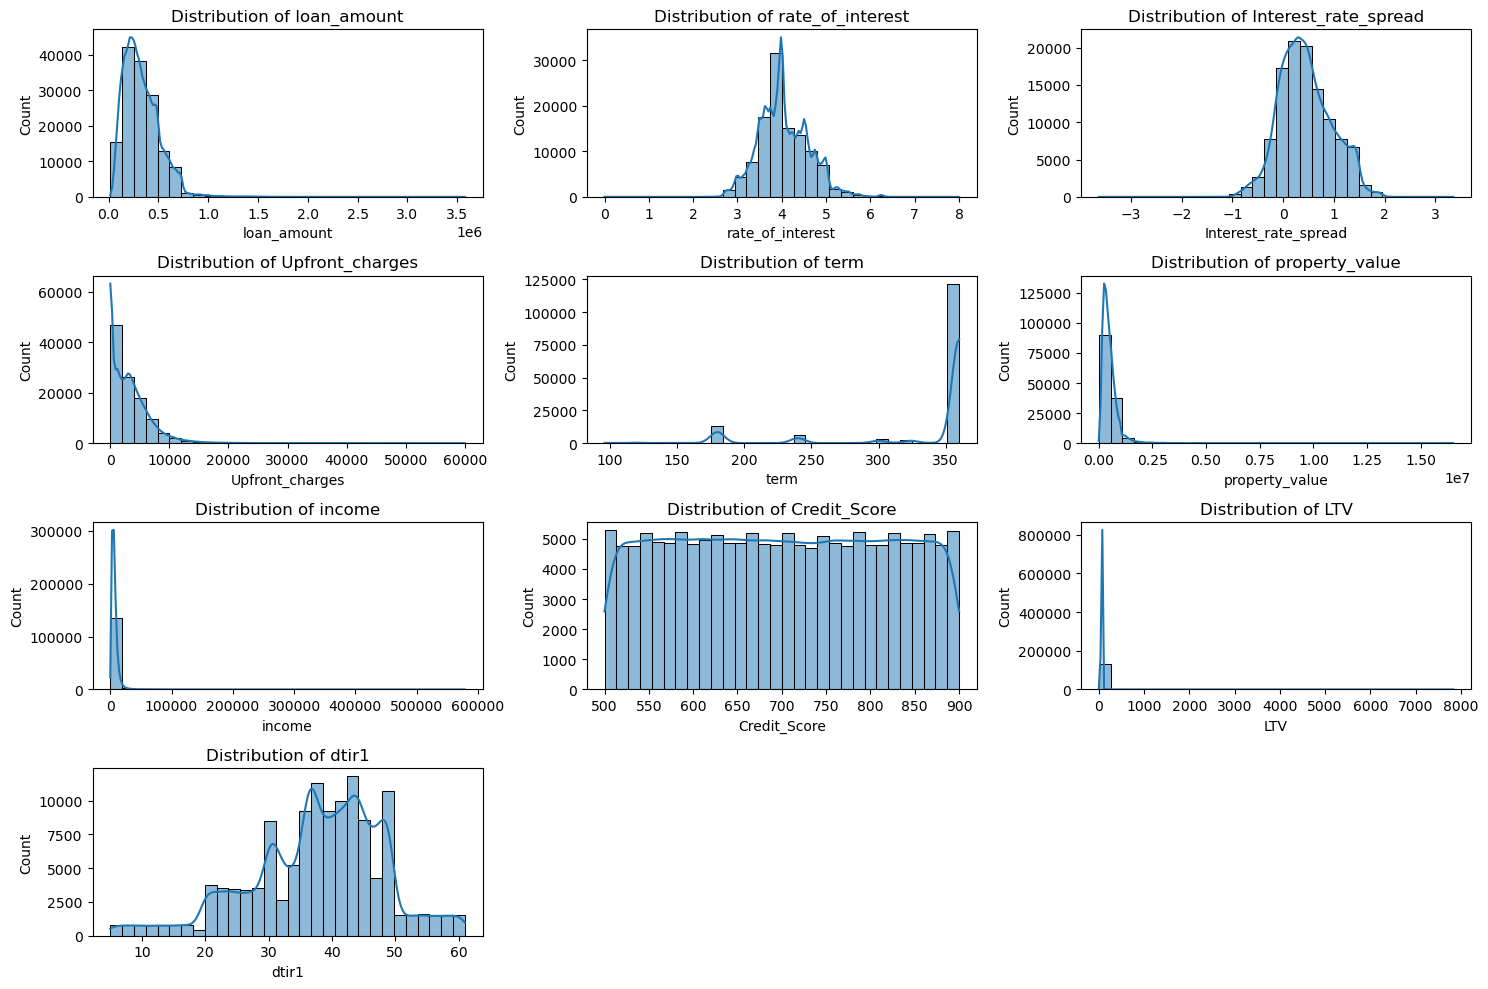

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical variables
numerical_vars = ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 
                  'Upfront_charges', 'term', 'property_value', 
                  'income', 'Credit_Score', 'LTV', 'dtir1']

# Plot histograms
plt.figure(figsize=(15, 10))
for i, var in enumerate(numerical_vars):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')
    
    # Save the figure
plt.savefig(f'Distribution_of_{var}_histogram.png') 
plt.tight_layout()
plt.show()


C:\Users\ohene\AppData\Local\Temp\ipykernel_24448\1698582481.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


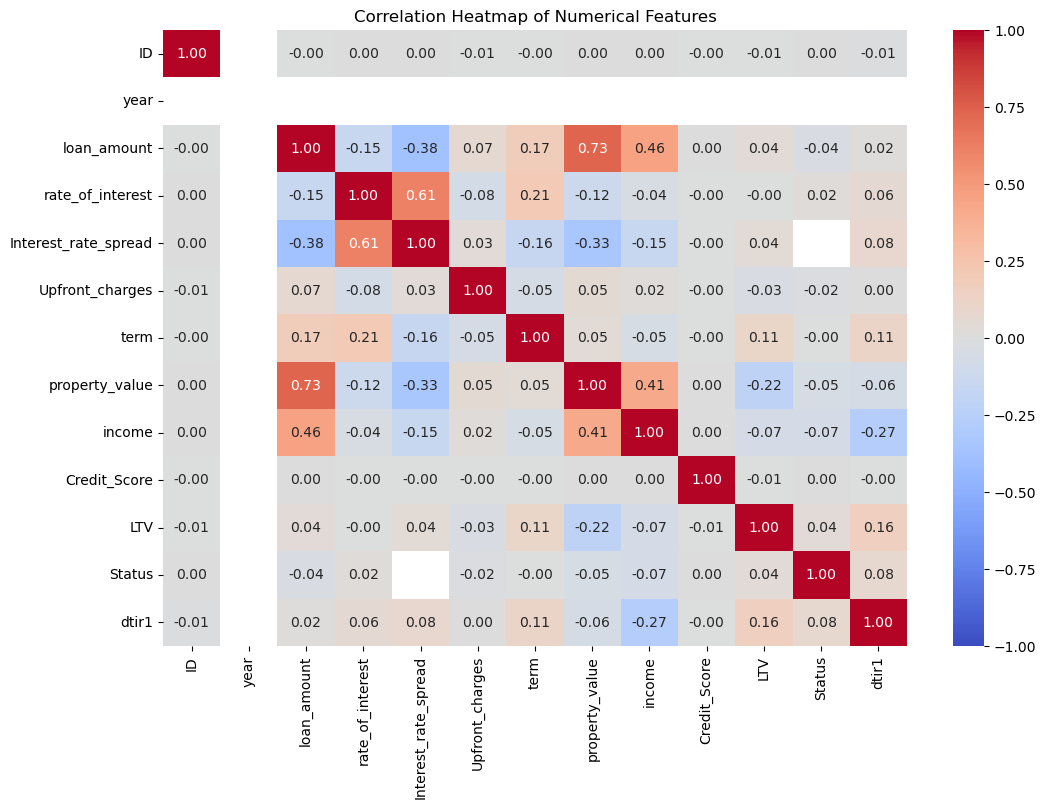

In [8]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.savefig('Correlation_Heatmap_of_Numerical_Features_histogram.png') 
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


0    112031
1     36639
Name: Status, dtype: int64


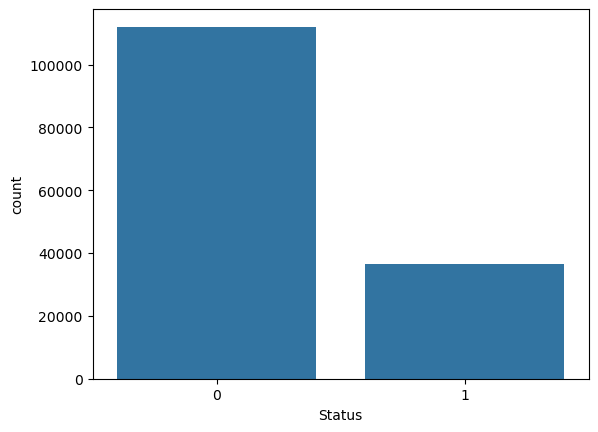

In [9]:
print(df['Status'].value_counts())
sns.countplot(x='Status', data=df)
plt.show()


In [10]:

X = df.drop('Status', axis=1)
y = df['Status']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)


In [11]:
# Check data types of the columns in X_train
print(X_train.dtypes)

# Find the columns with object type (which are likely to be strings)
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


ID                                     int64
year                                   int64
loan_amount                            int64
rate_of_interest                     float64
Interest_rate_spread                 float64
Upfront_charges                      float64
term                                 float64
property_value                       float64
income                               float64
Credit_Score                           int64
LTV                                  float64
dtir1                                float64
loan_limit_ncf                         uint8
Gender_Joint                           uint8
Gender_Male                            uint8
Gender_Sex Not Available               uint8
approv_in_adv_pre                      uint8
loan_type_type2                        uint8
loan_type_type3                        uint8
loan_purpose_p2                        uint8
loan_purpose_p3                        uint8
loan_purpose_p4                        uint8
Credit_Wor

In [16]:
from imblearn.over_sampling import SMOTE


In [17]:
from sklearn.impute import SimpleImputer

# Impute missing values with the median for numerical columns
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [18]:
# Apply SMOTE on the imputed training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)


In [19]:
# Perform one-hot encoding on non-numeric columns
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align the train and test datasets to ensure they have the same columns after encoding
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)



In [20]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to the non-numeric columns
label_encoders = {}
for col in non_numeric_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le


In [21]:
# Check if all columns in X_train_encoded are numeric
print(X_train_encoded.dtypes)


ID                                     int64
year                                   int64
loan_amount                            int64
rate_of_interest                     float64
Interest_rate_spread                 float64
Upfront_charges                      float64
term                                 float64
property_value                       float64
income                               float64
Credit_Score                           int64
LTV                                  float64
dtir1                                float64
loan_limit_ncf                         uint8
Gender_Joint                           uint8
Gender_Male                            uint8
Gender_Sex Not Available               uint8
approv_in_adv_pre                      uint8
loan_type_type2                        uint8
loan_type_type3                        uint8
loan_purpose_p2                        uint8
loan_purpose_p3                        uint8
loan_purpose_p4                        uint8
Credit_Wor

In [22]:
# Check for missing values in X_train
missing_values = X_train.isnull().sum()
print("Missing values in training set:\n", missing_values[missing_values > 0])

# Check for missing values in X_test
missing_values_test = X_test.isnull().sum()
print("Missing values in test set:\n", missing_values_test[missing_values_test > 0])


Missing values in training set:
 rate_of_interest        25591
Interest_rate_spread    25725
Upfront_charges         27812
term                       28
property_value          10616
income                   6481
LTV                     10616
dtir1                   17004
dtype: int64
Missing values in test set:
 rate_of_interest        10848
Interest_rate_spread    10914
Upfront_charges         11830
term                       13
property_value           4482
income                   2669
LTV                      4482
dtir1                    7117
dtype: int64


In [64]:
from sklearn.impute import SimpleImputer

# Impute missing values with the median for numerical columns
imputer = SimpleImputer(strategy='median')

# Apply imputation to training data
X_train_imputed = imputer.fit_transform(X_train)

# Apply imputation to testing data
X_test_imputed = imputer.transform(X_test)


In [65]:
# Check again for any remaining missing values
print("After imputation, any missing values in X_train_imputed? ", np.any(np.isnan(X_train_imputed)))
print("After imputation, any missing values in X_test_imputed? ", np.any(np.isnan(X_test_imputed)))


After imputation, any missing values in X_train_imputed?  False
After imputation, any missing values in X_test_imputed?  False


In [66]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE on the imputed training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)



In [67]:
from imblearn.combine import SMOTETomek

# Apply SMOTE-Tomek to balance the dataset
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train_imputed, y_train)


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Instantiate the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

In [69]:
# Align the training and testing data
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


In [70]:


# Retrain the model with the aligned and resampled training data
model.fit(X_train_smote, y_train_smote)


RandomForestClassifier(random_state=42)

In [71]:
# Make predictions on the test set
y_pred = model.predict(X_test_encoded)

C:\Users\ohene\anaconda3\envs\IOD\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [72]:

# Evaluate the model
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Accuracy Score:
0.9999775789780498


In [73]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33687
           1       1.00      1.00      1.00     10914

    accuracy                           1.00     44601
   macro avg       1.00      1.00      1.00     44601
weighted avg       1.00      1.00      1.00     44601



In [74]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[33687     0]
 [    1 10913]]


In [75]:
# Calculate ROC-AUC score
y_pred_proba = model.predict_proba(X_test_encoded)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nROC-AUC Score:", roc_auc)

C:\Users\ohene\anaconda3\envs\IOD\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



ROC-AUC Score: 1.0


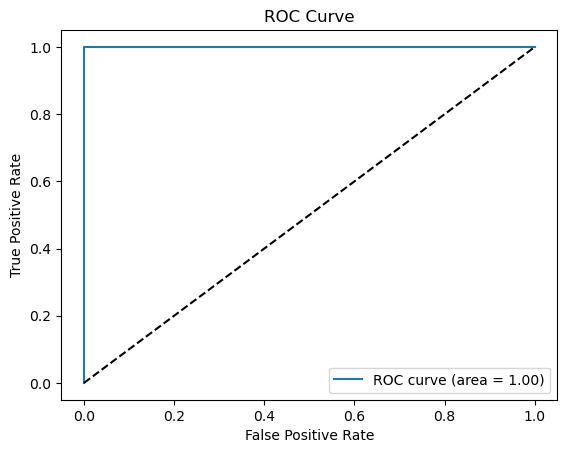

In [76]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [36]:
# Assuming df is your DataFrame and 'Status' is your target variable
X = df.drop('Status', axis=1)
y = df['Status']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Align the training and testing data to ensure they have the same columns after encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [37]:
# Check for NaN values after imputation
print("Checking for NaN values in X_train_imputed:", np.any(np.isnan(X_train_imputed)))
print("Checking for NaN values in X_test_imputed:", np.any(np.isnan(X_test_imputed)))


Checking for NaN values in X_train_imputed: False
Checking for NaN values in X_test_imputed: False


In [38]:
from sklearn.impute import SimpleImputer

# Impute missing values with the median for numerical columns
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test_imputed)


In [40]:
print("Final check for NaN in X_train_smote_scaled:", np.any(np.isnan(X_train_smote_scaled)))
print("Final check for NaN in X_test_scaled:", np.any(np.isnan(X_test_scaled)))


Final check for NaN in X_train_smote_scaled: False
Final check for NaN in X_test_scaled: False


In [41]:
# Check for infinite values in X_train_smote_scaled
print("Any infinite values in X_train_smote_scaled?", np.any(np.isinf(X_train_smote_scaled)))

# Check for infinite values in X_test_scaled
print("Any infinite values in X_test_scaled?", np.any(np.isinf(X_test_scaled)))


Any infinite values in X_train_smote_scaled? False
Any infinite values in X_test_scaled? False


In [42]:
# Check data types in X_train_smote_scaled
print(X_train_smote_scaled.dtype)

# Check data types in X_test_scaled
print(X_test_scaled.dtype)


float64
float64


In [43]:
# Reapply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)

# Then standardize
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test_imputed)


In [44]:
# Instantiate and train the Logistic Regression model with class weight set to balanced
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_smote_scaled, y_train_smote)


LogisticRegression(class_weight='balanced', random_state=42)

In [45]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


In [46]:
# Evaluate the model
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Accuracy Score:
0.8346225420954687


In [47]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     33687
           1       0.65      0.70      0.68     10914

    accuracy                           0.83     44601
   macro avg       0.78      0.79      0.78     44601
weighted avg       0.84      0.83      0.84     44601



In [48]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Confusion Matrix:
[[29538  4149]
 [ 3227  7687]]


In [49]:
# Calculate ROC-AUC score
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nROC-AUC Score:", roc_auc)



ROC-AUC Score: 0.8642783097721303


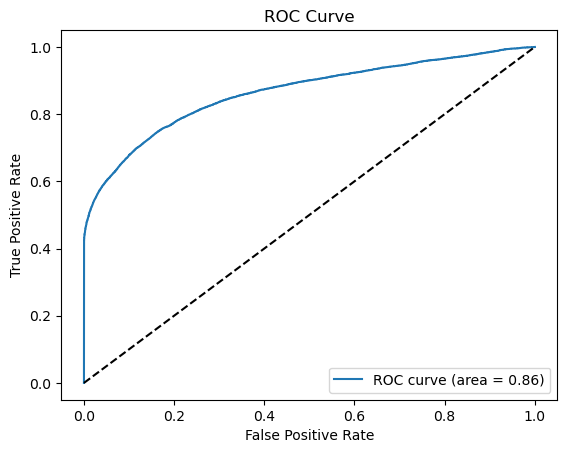

In [50]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [52]:
!pip install xgboost


     ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
     ---------------------------------------- 0.3/124.9 MB 9.9 MB/s eta 0:00:13
     ---------------------------------------- 0.6/124.9 MB 8.0 MB/s eta 0:00:16
     ---------------------------------------- 0.9/124.9 MB 7.2 MB/s eta 0:00:18
     ---------------------------------------- 1.2/124.9 MB 7.2 MB/s eta 0:00:18
      --------------------------------------- 1.6/124.9 MB 7.2 MB/s eta 0:00:18
      --------------------------------------- 1.6/124.9 MB 6.9 MB/s eta 0:00:18
      --------------------------------------- 1.6/124.9 MB 6.9 MB/s eta 0:00:18
      --------------------------------------- 1.9/124.9 MB 5.1 MB/s eta 0:00:24
      --------------------------------------- 2.1/124.9 MB 5.3 MB/s eta 0:00:24
      --------------------------------------- 2.1/124.9 MB 5.3 MB/s eta 0:00:24
      --------------------------------------- 2.1/124.9 MB 5.3 MB/s eta 0:00:24
      --------------------------------------- 2

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [54]:
from sklearn.impute import SimpleImputer

# Impute missing values with the median for numerical columns
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [55]:

X = df.drop('Status', axis=1)
y = df['Status']

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Align the training and testing data to ensure they have the same columns after encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [56]:
# Reapply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)

# Then standardize
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test_imputed)


In [57]:
# Initialize the XGBoost classifier with balanced scale position weight
model = xgb.XGBClassifier(scale_pos_weight=len(y_train_smote[y_train_smote == 0]) / len(y_train_smote[y_train_smote == 1]), random_state=42)

# Train the model
model.fit(X_train_smote_scaled, y_train_smote)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [58]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [59]:

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9999327369341494


In [60]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33687
           1       1.00      1.00      1.00     10914

    accuracy                           1.00     44601
   macro avg       1.00      1.00      1.00     44601
weighted avg       1.00      1.00      1.00     44601



In [61]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Confusion Matrix:
 [[33684     3]
 [    0 10914]]


In [62]:
# Calculate ROC-AUC score
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9999856797008806


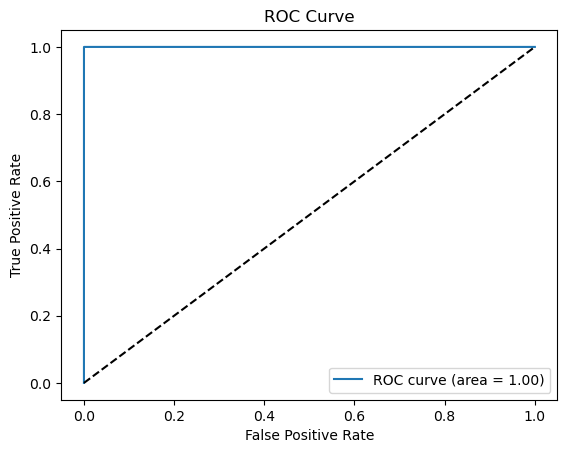

In [63]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()